# Exploring Decision Tree Algorithm

# Task - To create Decision Tree Classifier and visualize it graphically

## Initially, import all the necessary libraries required to fulfill the assigned task.

In [28]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from yellowbrick.target import ClassBalance
from yellowbrick.model_selection import FeatureImportances

## Import the mentioned dataset(iris dataset) using the 'sklearn.datasets' package 

In [29]:
iris=datasets.load_iris()

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualize the class imbalance using 'ClassBalance' from the 'yellowbrick.target' package.

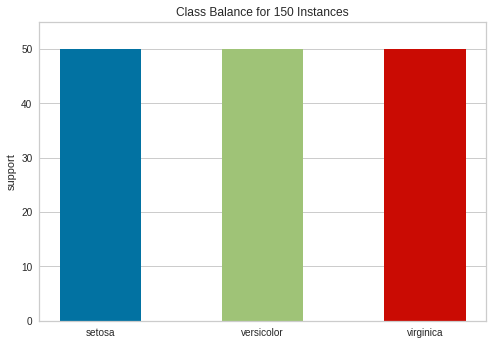

In [31]:
visualiser=ClassBalance(labels=['setosa', 'versicolor', 'virginica']).fit(y)
visualiser.show()

## Build the Decision Tree Classifier and visualize it.

In [32]:
decTree=DecisionTreeClassifier()
decTree.fit(iris_df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

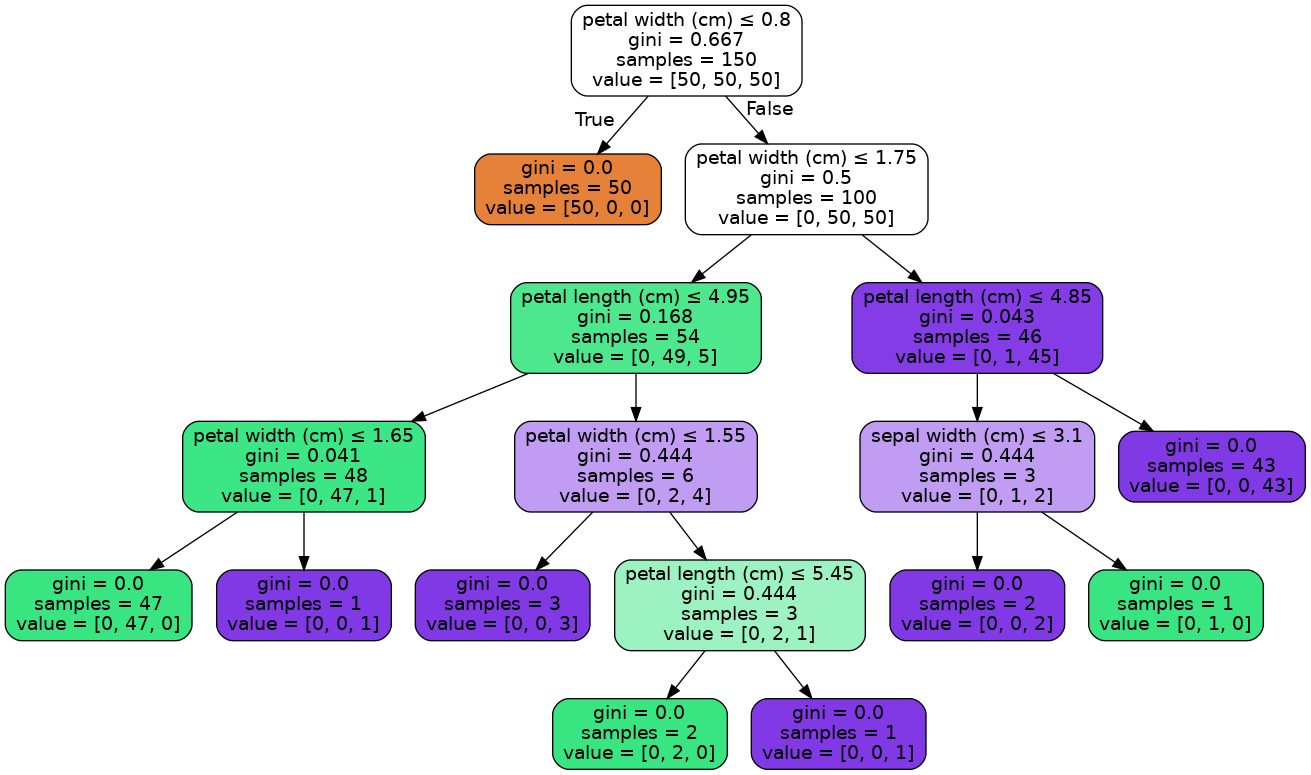

In [33]:
dotted_data = StringIO()
export_graphviz(decTree, out_file=dotted_data, feature_names=iris.feature_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dotted_data.getvalue())
Image(graph.create_png())

## Visualizing the importance of different features in context to our model by importing 'FeatureImportances' from the 'yellowbrick.model_selection' package.

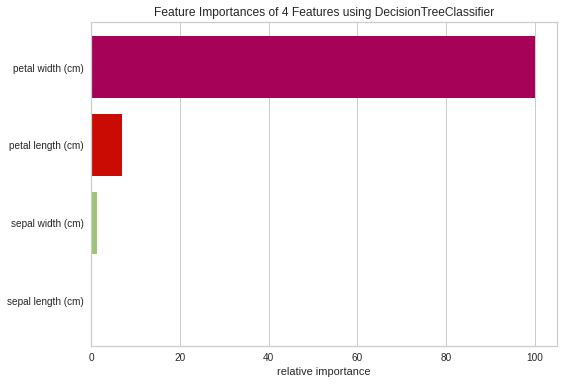

In [34]:
viz=FeatureImportances(decTree)
viz.fit(iris_df, y)
viz.show()